# D212 - Data Mining 2 Performance Assessment Task 2
Aidan Soares, 012042436, Western Governors University

### A1: Research Question
For this assessment I will be using the Churn dataset provided by WGU to answer the question "Can Principal Component Analysis be utilized to reduce dimensionality and idenitfy the principal components of customers within the dataset?".

### A2: Goal
My goal for this performance assessment is to isolate and identify the principal components relevant to the continuous customer information collected within the WGU churn dataset. This information on its own is vast and difficult to analyze, leading to limitations and restrictions for key stakeholders seeking relevant insights into customer satisfaction, user retention, and stable revenue flows. However, utilizing PCA could reduce the dimensionality of our diverse dataset, condensing it into a smaller one that still maintains correlating features and allows for more efficiency in data exploration and visualization. It is important to note that, while PCA cannot directly be used to assess for bottom-line issues such as customer retention, this reduction in dimensionality can still bear benefits to the company in the form of data that is easier to analyize, and some explanation on the variability of the data available.

### B1: PCA Justification
Principal Component Analysis is a dimensionality reduction method that identifies the foundational components (variables) of a dataset that have linear combinations and can explain significant variability within the larger aspects of the dataset. These variables are mixed together and combined to create new components that are uncorrelated with eachother, squeezing them together to reduce the broader space emcompassed by the number of features, so that data available is compressed to reduce data bloat, and allows for reduced computational analysis to be performed. While the data may lose a bit of accuracy in further assessment, the tradeoff is improved simplicity, as smaller datasets are easier to visualize and explore (Whitfield, 2024).

PCA is done in several steps:
1. Standardization of the data for analyis: typically standardized along z-scores so that the analysis can be performed on all data along the same plane of data range
2. Printing the covariance matrix to assess and identify major correlations: the matrix is composed of the 'weight' of the variables that contribute most to the PCs, the closer the absolute weight is to 1 the more that feature is associated with the PC
3. Calculating the eigenvalues of the covariance matrix: eigenvalues represent the total amount of variance within the dataset that can be explained per principal component
4. Select the most relevant PCs for the analysis: Principal Components will be selected on an eigenvalue basis as this represents the explained variability of the dataset. Per the Kaiser Rule, only PCs with eigenvalue above 1 will be kept

It is expected that the PCs selected will be limited in quantity as the explainable variables will decrease with each following PC, typically the first few PCs are most appropriate for our analysis

### B2: Assumption of PCA
For PCA to function correctly, it identifies features of a dataset that have underlying linear relationships for combination into principal components. Therefore, the major assumption for PCA is that continuous variables within the selected dataset must have underlying linear relationships for the analysis to function.

### C1: Dataset Variables
| Variable Name | Continuous/Categorical |
| :- | :- |
| Tenure | Continuous |
| Age | Continuous |
| Monthly Charge | Continuous |
| Bandwidth in GB/Year | Continuous |
| Outage in Seconds/Week | Continuous |

### C2: Data Standardization

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#importing dataset into a dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)

In [2]:
#printing non-null counts and duplicates within the dataset, in any exist
df.info()
df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

False    10000
dtype: int64

As no null values exist, I can continue with my standardization without imputation or deletion of entries.

In [3]:
#creating the dataframe that houses only the data I require for PCA
pca_df = df[["Tenure", "Age", "MonthlyCharge", "Bandwidth_GB_Year", "Outage_sec_perweek"]]
pca_df.head()

,Tenure,Age,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek
CaseOrder,,,,,
1,6.795513,68,172.455519,904.536110,7.978323
2,1.156681,27,242.632554,800.982766,11.699080
3,15.754144,50,159.947583,2054.706961,10.752800
4,17.087227,48,119.956840,2164.579412,14.913540
5,1.670972,83,149.948316,271.493436,8.147417


In [4]:
#normalizing the data by z-score
df_normalized = (pca_df-pca_df.mean())/pca_df.std()
df_normalized.head()

,Tenure,Age,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek
CaseOrder,,,,,
1,-1.048694,0.720889,-0.003942,-1.138430,-0.679944
2,-1.261938,-1.259894,1.630244,-1.185817,0.570303
3,-0.709904,-0.148723,-0.295210,-0.612107,0.252334
4,-0.659491,-0.245347,-1.226460,-0.561829,1.650423
5,-1.242489,1.445566,-0.528059,-1.428113,-0.623125


My cleaned and prepared dataset containing only the variables relevant for analysis can be found below, submitted alongside my jupyter notebook.

In [5]:
#exporting dataset to csv file
df_normalized.to_csv('pca_dataset.csv', index=False)

### D1: PCA Matrix

In [6]:
#shaping the data based on number of principal components, re-utilizing my code from D206 (Soares, 2024)
pca = PCA(n_components=pca_df.shape[1])

#fitting PCA onto normalized dataset, generate number of principal components
pca.fit(df_normalized)

PCA(n_components=5)

In [7]:
#creating and loading new PCA matrix using the normalized data and the 5 total components
df_pca_loading = pd.DataFrame(pca.components_.T,
                              columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
                             index=df_normalized.columns)

df_pca_loading

,PC1,PC2,PC3,PC4,PC5
Tenure,0.705864,-0.045902,-0.000241,-0.043112,-0.705543
Age,0.001977,0.072415,0.901334,-0.426404,0.023014
MonthlyCharge,0.040781,0.723087,0.246817,0.642251,-0.045573
Bandwidth_GB_Year,0.707146,-0.001786,-0.013554,0.012473,0.706826
Outage_sec_perweek,0.005882,0.685413,-0.355662,-0.635357,0.000238


### D2: Number of Principal Components

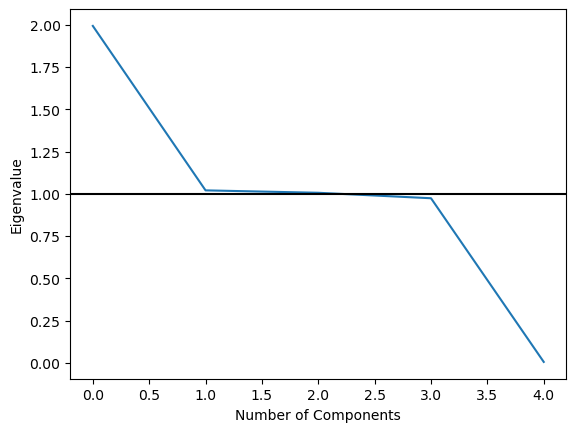

[1.9929757084871147,
 1.020463219773508,
 1.0062292803819015,
 0.9739007706046443,
 0.005931020752881161]

In [8]:
#creating covariance matrix
cov_matrix = np.dot(df_normalized.T, df_normalized)/pca_df.shape[0]

#creating eigenvectors
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

#plotting the eigenvectors in a screeplot with a line across the y axis at y=1 for use in the Kaiser Rule
plt.plot(eigenvalues)
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color="black")
plt.show()

#printing the eigenvalues as a list for better clarity in Kaiser Rule
eigenvalues

From the above, both the graph and the array indicate that based on the Kaiser rule, the first PCs that should be kept are PC1, PC2, and PC3, as they all have an eigenvalue above 1.

### D3: PC Variance

In [9]:
variances = pd.DataFrame({"PC Number": range(1, 6), "Explained Variance": pca.explained_variance_,
                          "Explained Variance Ratio": pca.explained_variance_ratio_})
print(variances.to_string(index=False))

 PC Number  Explained Variance  Explained Variance Ratio
         1            1.993175                  0.398635
         2            1.020565                  0.204113
         3            1.006330                  0.201266
         4            0.973998                  0.194800
         5            0.005932                  0.001186


We are only utilizing only PCs 1-3 for this analysis, PC1 has an explained variance ratio of 39.9% and explained variance number of 1.99, PC2 has an explained variance ratio of 20.4% and explained variance number of 1.02, and PC3 has an explained variance ratio of 20.1% and explained variance number of 1.00.

### D4: Total Variance

In [10]:
print("The total explained variance encapsulated by our PCs chosen for the PCA is: " + 
      str(variances["Explained Variance Ratio"].head(3).sum().round(4)*100) + "%")

The total explained variance encapsulated by our PCs chosen for the PCA is: 80.4%


### D5: Summary of Results
Overall, the PCA conducted allowed for a reduction in the dimensionality of the dataset, comprised of just 3 Principal Components in comparison to the 5 dimensions originally selected for analysis. As can be seen from the Scree plot generated in Section D2, the number of components relevant to PCA was determined as 3 based on the Kaiser Rule. From the Matrix created in Section D1, PC1 is shown to have influence from both Tenure and Annual Bandwidth, PC2 is shown to carry influence from Monthly Charge and Outage, and PC3 is shown to have influence from primarily customer Age, all based on the weights seen within said matrix. Overall, despite the reduced dimensionality, the 3 PCs selected from the analysis can explain over 80% of the variance that would be seen within the larger dataset. This allows for further analysis to be conducted on a smaller dataset to generate insights for upper level management and major stakeholders with less computational difficulty in detecting patterns and visualizing relationships due to the condensed data.

### G: Code Sources
Soares, Aidan. March 7, 2024. *D206 Performance Assessment*. Western Governors University.

### H: Sources
Whitfield, Brennan. Feb 23, 2024. *A Step-by-Step Explanation of Principal Component Analysis (PCA)*. Builtin. https://builtin.com/data-science/step-step-explanation-principal-component-analysis